In [49]:
from statsmodels.tsa.vector_ar.var_model import VAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller


CURR_DIR_PATH = os.getcwd()
FILE_PATH = CURR_DIR_PATH + '/data/'

emission_df = pd.read_csv(f'{FILE_PATH}transformed_sweden_data/sweden_regions_emissions.csv')
emission_df[emission_df['Population'].isna()]

emission_df = emission_df[emission_df['Year'] >= 2010]
emission_df['Year'] = pd.to_datetime(emission_df['Year'], format='%Y')
emission_df['Total Emissions'] = emission_df['Total Emissions'].astype(float)



In [50]:
# pivot df to have regions as columns and years as index
emission_pivot = emission_df.pivot(index='Year', columns='Region', values='Total Emissions')
emission_pivot

Region,Blekinge County,Dalarna County,Gaevleborg County,Gavleborg County,Gotland County,Halland County,Jaemtland County,Jamtland County,Joenkoeping County,Jonkoping County,...,Vaermland County,Vaesterbotten County,Vaesternorrland County,Vaestmanland County,Vaestra Goetaland County,Varmland County,Vasterbotten County,Vasternorrland County,Vastmanland County,Vastragotaland County
Year,,,,,,,,,,,,,,,,,,,,,
2010-01-01,12017.00000,872.00000,NaN,2279.0,1998.000000,1954.000000,NaN,827.0,NaN,2023.0,...,NaN,NaN,NaN,NaN,NaN,1649.0,1635.0,1965.0,2175.0,12017.0
2015-01-01,10335.00000,589.00000,NaN,2487.0,1737.000000,1473.000000,NaN,717.0,NaN,1755.0,...,NaN,NaN,NaN,NaN,NaN,1318.0,1506.0,1472.0,1377.0,10335.0
2016-01-01,10527.00000,556.00000,NaN,2418.0,1732.000000,1459.000000,NaN,696.0,NaN,1699.0,...,NaN,NaN,NaN,NaN,NaN,1292.0,1480.0,1502.0,1391.0,10527.0
2017-01-01,10347.00000,546.00000,NaN,2325.0,1676.000000,1376.000000,NaN,653.0,NaN,1694.0,...,NaN,NaN,NaN,NaN,NaN,1286.0,1494.0,1480.0,1359.0,10347.0
2018-01-01,10613.00000,562.00000,NaN,2432.0,1592.000000,1326.000000,NaN,545.0,NaN,1653.0,...,NaN,NaN,NaN,NaN,NaN,1248.0,1484.0,1466.0,1321.0,10613.0
2019-01-01,9991.00000,514.00000,NaN,2250.0,1571.000000,1296.000000,NaN,533.0,NaN,1627.0,...,NaN,NaN,NaN,NaN,NaN,1233.0,1437.0,1426.0,1281.0,9991.0
2020-01-01,8970.00000,482.00000,NaN,2097.0,1473.000000,1183.000000,NaN,494.0,NaN,1528.0,...,NaN,NaN,NaN,NaN,NaN,1149.0,1319.0,1332.0,1134.0,8970.0
2021-01-01,9956.00000,552.00000,NaN,2013.0,1513.000000,1182.000000,NaN,489.0,NaN,1536.0,...,NaN,NaN,NaN,NaN,NaN,1173.0,1346.0,1358.0,1203.0,9956.0
2022-01-01,602.57704,1440.97338,1088.133858,NaN,1961.695764,1335.911085,428.78944,NaN,1388.603106,NaN,...,1059.514456,1200.77807,1314.60406,1062.779418,748.528768,NaN,NaN,NaN,NaN,NaN


In [51]:
emission_pivot_log = np.log(emission_pivot) # np.log to reduce range of data and stabilize variance
emission_pivot_log

c:\repos\graduationa_project_carbon_calculator\graduation_venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Region,Blekinge County,Dalarna County,Gaevleborg County,Gavleborg County,Gotland County,Halland County,Jaemtland County,Jamtland County,Joenkoeping County,Jonkoping County,...,Vaermland County,Vaesterbotten County,Vaesternorrland County,Vaestmanland County,Vaestra Goetaland County,Varmland County,Vasterbotten County,Vasternorrland County,Vastmanland County,Vastragotaland County
Year,,,,,,,,,,,,,,,,,,,,,
2010-01-01,9.394078,6.770789,NaN,7.731492,7.599902,7.577634,NaN,6.717805,NaN,7.612337,...,NaN,NaN,NaN,NaN,NaN,7.407924,7.399398,7.583248,7.684784,9.394078
2015-01-01,9.243291,6.378426,NaN,7.818832,7.459915,7.295056,NaN,6.575076,NaN,7.470224,...,NaN,NaN,NaN,NaN,NaN,7.183871,7.317212,7.294377,7.227662,9.243291
2016-01-01,9.261699,6.320768,NaN,7.790696,7.457032,7.285507,NaN,6.545350,NaN,7.437795,...,NaN,NaN,NaN,NaN,NaN,7.163947,7.299797,7.314553,7.237778,9.261699
2017-01-01,9.244452,6.302619,NaN,7.751475,7.424165,7.226936,NaN,6.481577,NaN,7.434848,...,NaN,NaN,NaN,NaN,NaN,7.159292,7.309212,7.299797,7.214504,9.244452
2018-01-01,9.269835,6.331502,NaN,7.796469,7.372746,7.189922,NaN,6.300786,NaN,7.410347,...,NaN,NaN,NaN,NaN,NaN,7.129298,7.302496,7.290293,7.186144,9.269835
2019-01-01,9.209440,6.242223,NaN,7.718685,7.359468,7.167038,NaN,6.278521,NaN,7.394493,...,NaN,NaN,NaN,NaN,NaN,7.117206,7.270313,7.262629,7.155396,9.209440
2020-01-01,9.101641,6.177944,NaN,7.648263,7.295056,7.075809,NaN,6.202536,NaN,7.331715,...,NaN,NaN,NaN,NaN,NaN,7.046647,7.184629,7.194437,7.033506,9.101641
2021-01-01,9.205931,6.313548,NaN,7.607381,7.321850,7.074963,NaN,6.192362,NaN,7.336937,...,NaN,NaN,NaN,NaN,NaN,7.067320,7.204893,7.213768,7.092574,9.205931
2022-01-01,6.401216,7.273074,6.992219,NaN,7.581565,7.197369,6.060966,NaN,7.236054,NaN,...,6.965566,7.090725,7.181291,6.968643,6.61811,NaN,NaN,NaN,NaN,NaN


In [54]:
# do .diff() to make data stationary (e.g. mean doesnt't change along time series). 
emission_pivot_diff = emission_pivot_log.diff().dropna() # calcs difference between each element and the previous, need dropna because a NaN is introduced as first entry has no prev entry
emission_pivot_diff

Region,Blekinge County,Dalarna County,Gaevleborg County,Gavleborg County,Gotland County,Halland County,Jaemtland County,Jamtland County,Joenkoeping County,Jonkoping County,...,Vaermland County,Vaesterbotten County,Vaesternorrland County,Vaestmanland County,Vaestra Goetaland County,Varmland County,Vasterbotten County,Vasternorrland County,Vastmanland County,Vastragotaland County
Year,,,,,,,,,,,,,,,,,,,,,


In [53]:
model = VAR(emission_pivot_diff)
model_fit = model.fit()

forecast_steps = 3 # steps = number of years to forecast
lag_order = model_fit.k_ar # retrieve optimal lag_order (= amount of previous steps used in model) from model_fit

forecast_input = emission_pivot_diff.values[-lag_order:] # conv to np array, slice last lag_order to use when forecasting. If lag_order = 3, returns array with 3 nested arrays with 19 entries(each region)
forecast_diff = model_fit.forecast(y=forecast_input, steps=forecast_steps) # returns array with nested array of forecasted data for each step, predictions also in diffferences 
forecast_diff


c:\repos\graduationa_project_carbon_calculator\graduation_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
# create range of future years, length matching steps
forecast_index = pd.date_range(
    # start at last known data point, starts forecast at start + 1 year and predicts three years
    start=emission_pivot.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='YS') # YS = year start, start of year as frequency (yyyy-01-01)

# create a forecast df (three rows, matching steps): use prev range as index, forecast_diff as values and get column names from emission_pivot (need to be identical for later)
forecast_diff_df = pd.DataFrame(
    forecast_diff, index=forecast_index, columns=emission_pivot.columns)
forecast_diff_df 

Region,Aaland,Central Finland,Central Ostrobothnia,Kainuu,Kanta-Haeme,Kymenlaakso,Lapland,North Karelia,North Ostrobothnia,North Savo,Ostrobothnia,Paeijaet-Haeme,Pirkanmaa,Satakunta,South Karelia,South Ostrobothnia,South Savo,Southwest Finland,Uusimaa
2023-01-01,-0.010566,-0.008208,-0.017869,0.004844,-0.001182,-0.005544,-0.015128,-0.011400,-0.021411,0.000626,-0.007103,0.024107,-0.008334,-0.009466,0.009808,-0.015248,-0.012207,-0.004286,0.017629
2024-01-01,0.025187,-0.008615,-0.002760,0.017402,-0.003888,0.006503,-0.001657,-0.028219,0.001795,-0.021680,0.011413,-0.023042,-0.012629,-0.007191,-0.015207,0.003115,-0.023123,-0.028071,0.006316
2025-01-01,-0.114819,-0.059869,-0.041850,-0.025031,-0.070732,-0.088891,-0.040375,-0.060214,-0.039243,-0.037079,-0.083834,-0.134794,-0.063676,-0.068523,-0.076579,-0.035796,-0.060253,-0.127876,-0.112532


In [ ]:
# conv forecast back to original scale 
last_log_values = emission_pivot_log.iloc[-1]
forecast_log_original = last_log_values + forecast_diff_df.cumsum() # cumulative sum of forecast diff values, basically undo the diff
forecast_original = np.exp(forecast_log_original) # "undo" the log operation

# append forecast data (now in original scale) to historical data
combined_series = pd.concat([emission_pivot, forecast_original])
print(combined_series)



Region          Aaland  Central Finland  Central Ostrobothnia      Kainuu  \
2010-01-01  296.800000      2376.500000            977.100000  814.700000   
2015-01-01  241.200000      1748.300000            814.600000  597.400000   
2016-01-01  252.100000      1830.300000            844.100000  637.400000   
2017-01-01  240.200000      1734.400000            807.300000  628.100000   
2018-01-01  242.900000      1766.800000            807.800000  633.500000   
2019-01-01  233.600000      1690.900000            792.500000  628.500000   
2020-01-01  196.800000      1558.800000            745.800000  592.600000   
2021-01-01  192.900000      1512.500000            729.600000  573.100000   
2022-01-01  181.800000      1404.500000            697.700000  575.400000   
2023-01-01  179.889184      1393.018390            685.343323  578.193872   
2024-01-01  184.477685      1381.069546            683.454342  588.343830   
2025-01-01  164.466867      1300.812567            655.441768  573.799986   

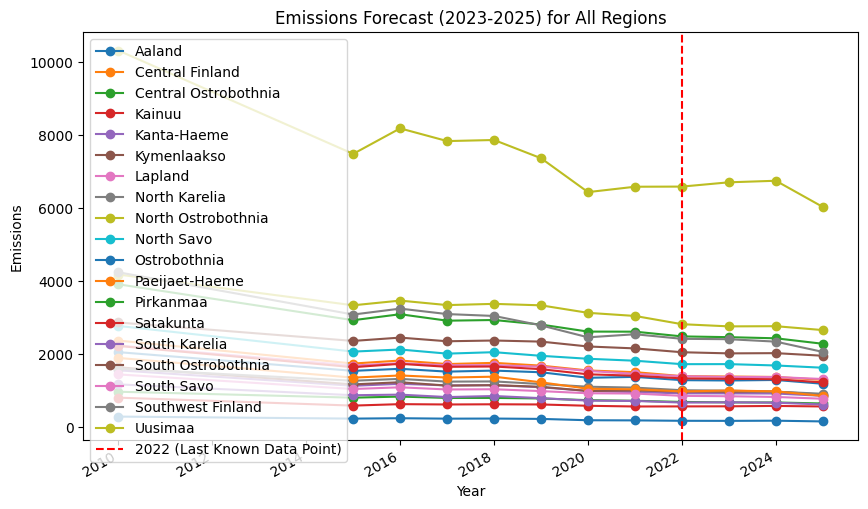

In [ ]:
combined_series.plot(figsize=(10, 6), marker='o')
plt.axvline(x=emission_pivot.index[-1], color='red',
            linestyle='--', label='2022 (Last Known Data Point)') #vertical line to mark split between historical/forecast data
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Emissions Forecast (2023-2025) for All Regions')
plt.legend()
plt.show()